In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import pytesseract
TESSERACT_LINK = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = TESSERACT_LINK

In [36]:
link_mucluc = r"D:\Product\text_summarizer\datasets\data_image\TTX-Khung CPDT_V01_20180910\TTX-Khung CPDT_V01_20180910_page_1.png"
# Load ảnh
image_1 = cv2.imread(link_mucluc)
image_2 = cv2.imread(link_mucluc)
print(image_1.shape)
print(image_2.shape)

(2339, 1654, 3)
(2339, 1654, 3)


In [37]:
# Chuyển ảnh sang ảnh grayscale
gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

# Sử dụng MSER để phát hiện vùng chữ
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(gray)

# Lọc các vùng quá nhỏ
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
hulls = [h for h in hulls if cv2.contourArea(h) > 100]

# Sắp xếp các vùng theo thứ tự từ trên xuống dưới
hulls.sort(key=lambda x: cv2.boundingRect(x)[1])

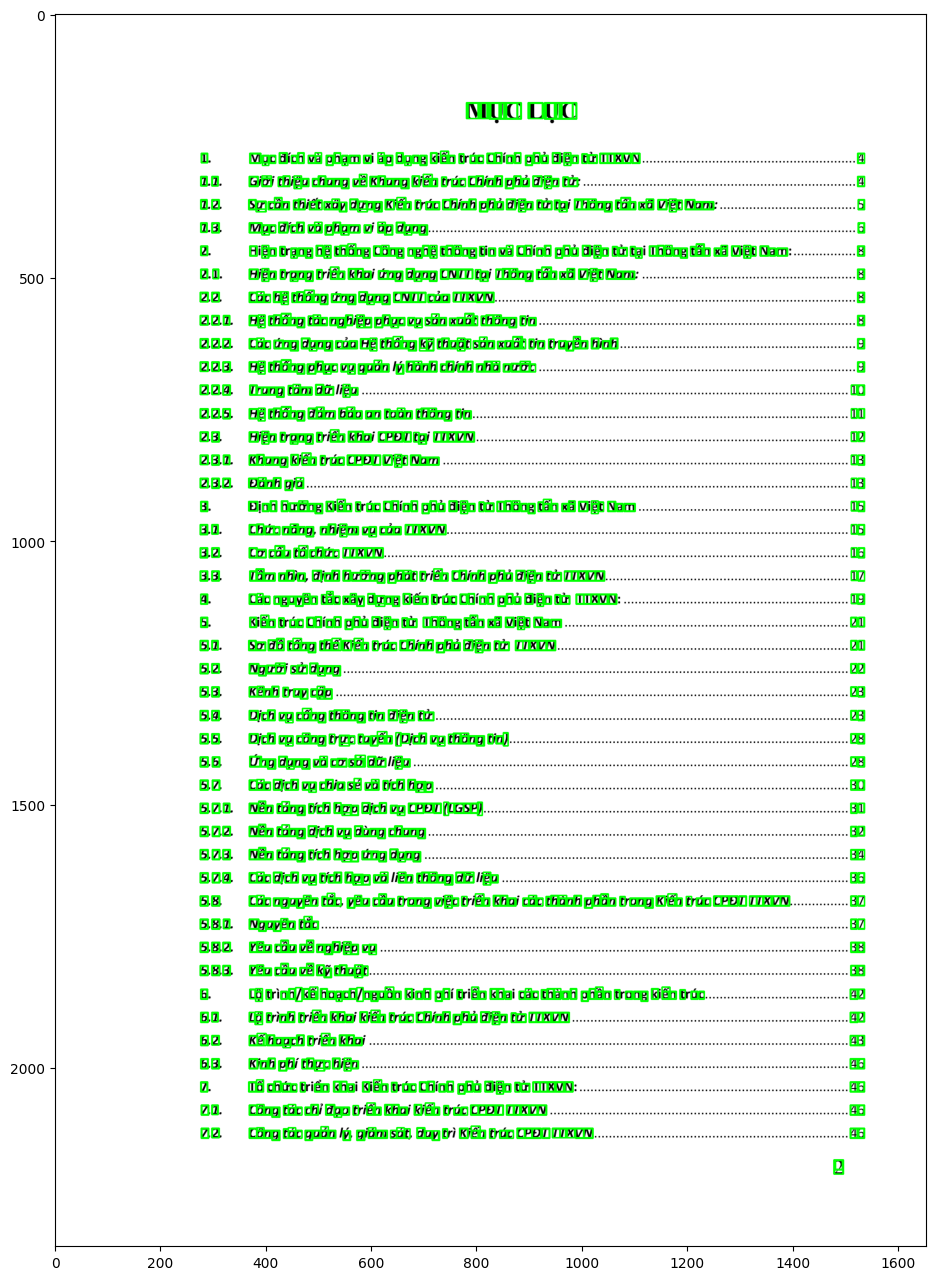

In [38]:
# Vẽ hình chữ nhật quanh các vùng chữ
for hull in hulls:
    x, y, w, h = cv2.boundingRect(hull)
    cv2.rectangle(image_1, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Lưu ảnh có vùng chữ được vẽ
# cv2.imwrite(r'D:\Product\text_summarizer\datasets\data_test\output.jpg', image_1)
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_1)

In [7]:
# Chia ảnh thành các dòng chữ
lines = []
line = []
for hull in hulls:
    x, y, w, h = cv2.boundingRect(hull)
    if line and y - line[-1][1] > h * 1.2:  # Nếu khoảng cách lớn hơn 1.2 lần chiều cao
        lines.append(line)
        line = []
    line.append((x, y, x + w, y + h))
if line:
    lines.append(line)

In [8]:
# Tính toán khoảng cách trung bình giữa các dòng chữ
avg_line_spacing = sum(line[0][1] - line[-1][3] for line in lines) / len(lines)

# Tính toán padding
line_margin = int((avg_line_spacing / 8))
print("margin = ", line_margin)
# Lấy kích thước ảnh
height, width = image_1.shape[:2]
print("height, width = ", height, width)


margin =  -11
height, width =  2339 1654


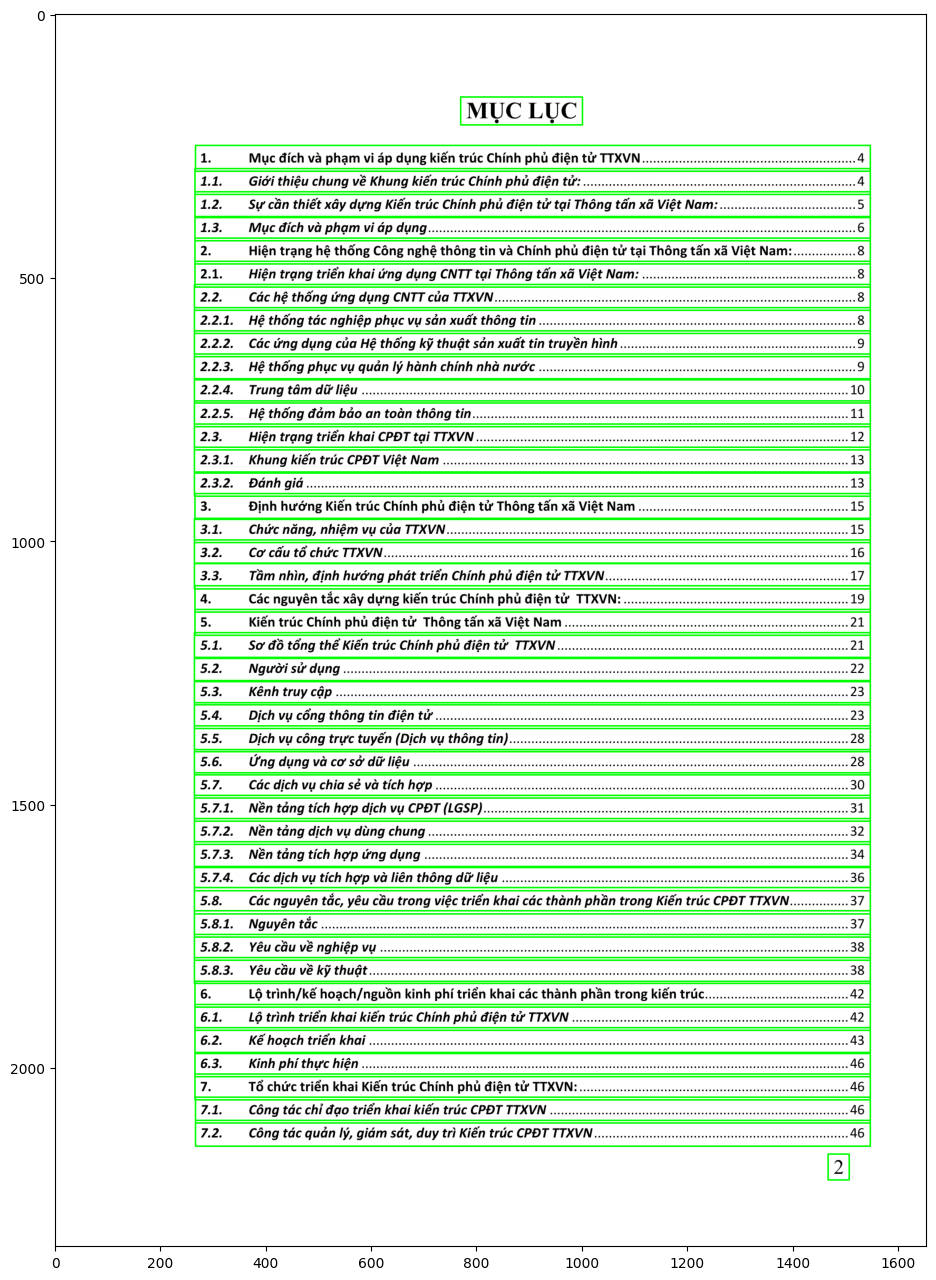

In [9]:
lines_rects = []
for line in lines:
    # Tính toán margin trái phải
    # left_margin = min(rect[0] for rect in line)
    # right_margin = width - max(rect[2] for rect in line)
    # horizontal_margin = int(min(left_margin, right_margin) / 2)

    # x_min = min(rect[0] for rect in line) - horizontal_margin
    x_min = min(rect[0] for rect in line) + line_margin
    y_min = min(rect[1] for rect in line) + line_margin
    # x_max = max(rect[2] for rect in line) + horizontal_margin
    x_max = max(rect[2] for rect in line) - line_margin
    y_max = max(rect[3] for rect in line) - line_margin
    lines_rects.append((x_min, y_min, x_max, y_max))
    # Vẽ hình chữ nhật lớn xung quanh tất cả các hình chữ nhật con

    cv2.rectangle(image_2, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)


# Lưu ảnh có vùng chữ được vẽ

cv2.imwrite(r"D:\Product\text_summarizer\datasets\data_test\output2.jpg", image_2)

plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_2)

In [10]:
# Đảm bảo rằng thư mục lưu trữ ảnh đã được tạo
import os

output_dir = 'output_images'
os.makedirs(output_dir, exist_ok=True)

In [11]:
def crop_box(image, box_coordinates):
    """
    Cắt ảnh theo tọa độ hình chữ nhật đã cho.

    Args:
        image (numpy.ndarray): Ảnh nguồn.
        box_coordinates (tuple): Tọa độ hình chữ nhật (x_min, y_min, x_max, y_max).

    Returns:
        numpy.ndarray: Ảnh đã được cắt theo tọa độ hình chữ nhật.
    """
    x_min, y_min, x_max, y_max = box_coordinates
    return image[y_min:y_max, x_min:x_max]

In [12]:
print(lines)

[[(781, 168, 821, 198), (781, 168, 821, 198), (781, 168, 821, 198), (781, 168, 821, 198), (780, 168, 821, 198), (780, 168, 821, 198), (780, 168, 821, 198), (780, 168, 822, 198), (823, 168, 853, 199), (823, 168, 853, 199), (823, 168, 853, 199), (823, 168, 853, 199), (823, 168, 854, 199), (823, 168, 854, 199), (823, 168, 854, 199), (856, 168, 876, 198), (856, 168, 877, 198), (856, 168, 883, 198), (856, 168, 883, 198), (856, 168, 883, 198), (856, 168, 883, 198), (856, 168, 883, 199), (856, 168, 883, 199), (856, 168, 884, 199), (856, 168, 884, 199), (856, 168, 884, 199), (856, 168, 884, 199), (856, 168, 884, 199), (856, 168, 884, 199), (856, 168, 884, 199), (856, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (855, 168, 884, 199), (898, 168, 925, 198), (898, 168, 925, 198), (897, 168, 925, 198), (897, 168, 925, 198), (897, 168, 925, 198), (928, 16

In [13]:
# # Xử lý từng dòng chữ và lưu ảnh vào tệp tin
# for i, line in enumerate(lines):
#     # Cắt ảnh theo dòng chữ
#     roi = image_2[min(rect[1] for rect in line):max(rect[3] for rect in line),
#                 min(rect[0] for rect in line):max(rect[2] for rect in line)]
#     # Đặt tên cho tệp tin ảnh
#     filename = os.path.join(output_dir, f'line_{i}.jpg')
    
#     # Lưu ảnh vào tệp tin
#     cv2.imwrite(filename, roi)

In [14]:

# Xử lý từng dòng chữ và lưu ảnh vào tệp tin
for i, line in enumerate(lines_rects):
    roi = crop_box(image_2, line)
    # Đặt tên cho tệp tin ảnh
    filename = os.path.join(output_dir, f'line_{i}.jpg')
    
    # Lưu ảnh vào tệp tin
    cv2.imwrite(filename, roi)

In [39]:
def detect_text_area(image):
    if len(image.shape) == 3:
        # Nếu ảnh không phải là ảnh grayscale, chuyển đổi sang ảnh grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        # Nếu ảnh đã là ảnh grayscale, sử dụng ảnh đó trực tiếp
        gray = image.copy()
    # Sử dụng MSER để phát hiện vùng chữ
    mser = cv2.MSER_create()
    regions, _ = mser.detectRegions(gray)

    # Lọc các vùng quá nhỏ
    hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
    hulls = [h for h in hulls if cv2.contourArea(h) > 100]
    # Sắp xếp các vùng theo thứ tự từ trên xuống dưới
    hulls.sort(key=lambda x: cv2.boundingRect(x)[1])

    return hulls

In [41]:
def detect_line_word(image):
    hulls = detect_text_area(image)
    # Chia ảnh thành các dòng chữ
    lines = []
    current_line = []
    for hull in hulls:
        x, y, w, h = cv2.boundingRect(hull)
        if (
            current_line and y - current_line[-1][1] > h * 1.2
        ):  # Khoảng cách lớn hơn 1.2 lần chiều cao
            lines.append(current_line)
            current_line = []
        current_line.append((x, y, x + w, y + h))
    if current_line:
        lines.append(current_line)

    # Tính toán khoảng cách trung bình giữa các dòng chữ
    avg_line_spacing = sum(line[0][1] - line[-1][3] for line in lines) / len(lines)

    # Tính toán margin
    line_margin = int((avg_line_spacing / 8))
    # Lấy kích thước ảnh
    # height, width = image.shape[:2]

    # Tạo hình chữ nhật lớn nhất chứa các dòng chữ
    lines_rects = []
    for line in lines:
        # Tính toán margin trái phải
        # left_margin = min(rect[0] for rect in line)
        # right_margin = width - max(rect[2] for rect in line)
        # horizontal_margin = int(min(left_margin, right_margin) / 2)

        # x_min = min(rect[0] for rect in line) - horizontal_margin
        x_min = min(rect[0] for rect in line) + line_margin
        y_min = min(rect[1] for rect in line) + line_margin
        # x_max = max(rect[2] for rect in line) + horizontal_margin
        x_max = max(rect[2] for rect in line) - line_margin
        y_max = max(rect[3] for rect in line) - line_margin
        lines_rects.append((x_min, y_min, x_max, y_max))
    return lines_rects

In [ ]:
def detect_line_word(image):
    if len(image.shape) == 3:
        # Nếu ảnh không phải là ảnh grayscale, chuyển đổi sang ảnh grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        # Nếu ảnh đã là ảnh grayscale, sử dụng ảnh đó trực tiếp
        gray = image.copy()
    # Sử dụng MSER để phát hiện vùng chữ
    mser = cv2.MSER_create()
    regions, _ = mser.detectRegions(gray)

    # Lọc các vùng quá nhỏ
    hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
    hulls = [h for h in hulls if cv2.contourArea(h) > 100]
    # Sắp xếp các vùng theo thứ tự từ trên xuống dưới
    hulls.sort(key=lambda x: cv2.boundingRect(x)[1])
    # Chia ảnh thành các dòng chữ
    lines = []
    current_line = []
    for hull in hulls:
        x, y, w, h = cv2.boundingRect(hull)
        if (
            current_line and y - current_line[-1][1] > h * 1.2
        ):  # Khoảng cách lớn hơn 1.2 lần chiều cao
            lines.append(current_line)
            current_line = []
        current_line.append((x, y, x + w, y + h))
    if current_line:
        lines.append(current_line)

    # Tính toán khoảng cách trung bình giữa các dòng chữ
    avg_line_spacing = sum(line[0][1] - line[-1][3] for line in lines) / len(lines)

    # Tính toán margin
    line_margin = int((avg_line_spacing / 8))

    # Tạo hình chữ nhật lớn nhất chứa các dòng chữ
    lines_rects = []
    for line in lines:

        x_min = min(rect[0] for rect in line) + line_margin
        y_min = min(rect[1] for rect in line) + line_margin
        x_max = max(rect[2] for rect in line) - line_margin
        y_max = max(rect[3] for rect in line) - line_margin
        lines_rects.append((x_min, y_min, x_max, y_max))
    return lines_rects

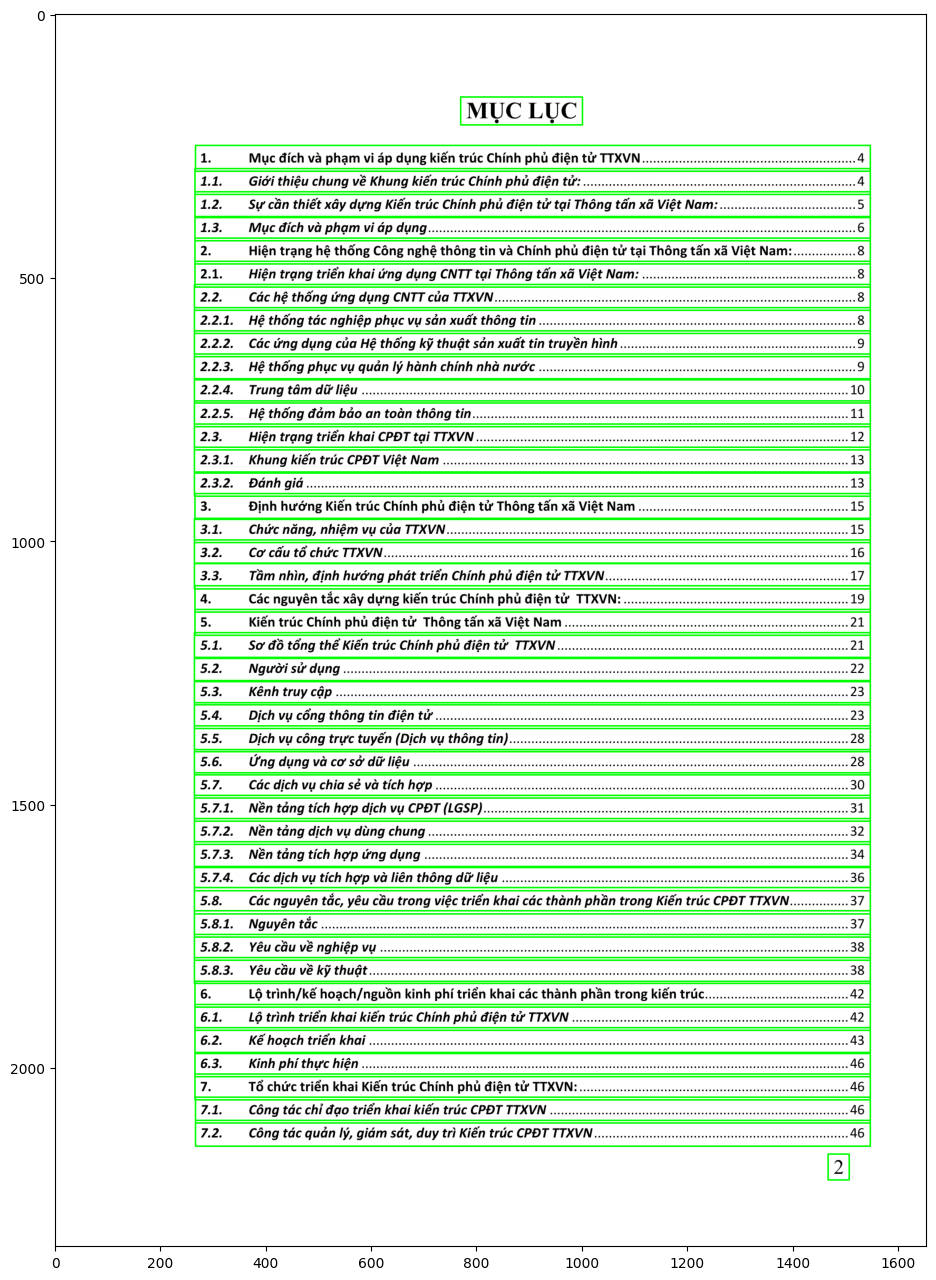

In [42]:
image_edit = cv2.imread(link_mucluc)

new_lines = detect_line_word(image_edit)

for line in new_lines:
    # Vẽ hình chữ nhật lớn xung quanh tất cả các hình chữ nhật con
    cv2.rectangle(image_edit, (line[0], line[1]), (line[2], line[3]), (0, 255, 0), 2)
    
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_edit)

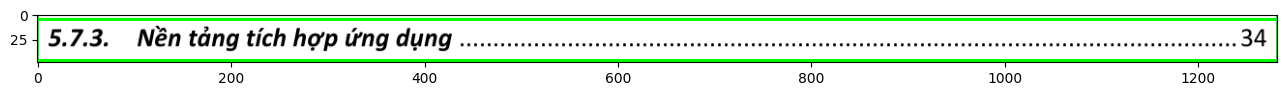

In [43]:
import random

image_crop = crop_box(image_edit, new_lines[random.randint(1, 42)])
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_crop)

In [44]:
detect_words = detect_text_area(image_crop)
# print(detect_words)

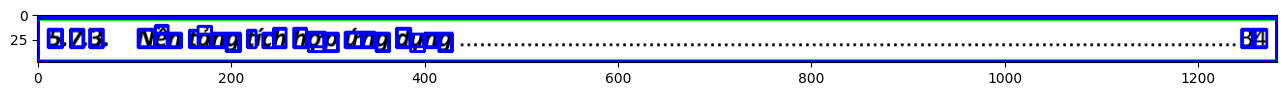

In [45]:
for detect_word in detect_words:
    x, y, w, h = cv2.boundingRect(detect_word)
    cv2.rectangle(image_crop, (x, y), (x + w, y + h), (0, 0, 255), 2)
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_crop)

In [20]:
import cv2
import re

# gray = cv2.cvtColor(image_crop, cv2.COLOR_BGR2GRAY)
text = pytesseract.image_to_string(image_crop, lang="vie")
text = " ".join(text.split()).strip()

print(text)

5.7.4. Các dịch vụ tích hợp và liên thông dữ liệu ..


In [21]:
# #!pip install easyocr
# import easyocr
# reader = easyocr.Reader(["vi"])
# reader.readtext(image_crop)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[8, 8], [74, 8], [74, 34], [8, 34]], '5.7.4.', 0.8607703781490091),
 ([[99, 1], [583, 1], [583, 42], [99, 42]],
  'Các dịch vụ tích hợp và liên thông dữ liệu',
  0.9222069066119236),
 ([[1242, 8], [1276, 8], [1276, 36], [1242, 36]], '36', 0.9999969654282558)]